Mean Squared Error для полинома степени 1: 19.37313898265922


C:\Temp\ipykernel_3240\2040623505.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("auto-mpg.data", names=column_names, delim_whitespace=True)
C:\Temp\ipykernel_3240\2040623505.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['horsepower'].fillna(data['horsepower'].median(), inplace=True)


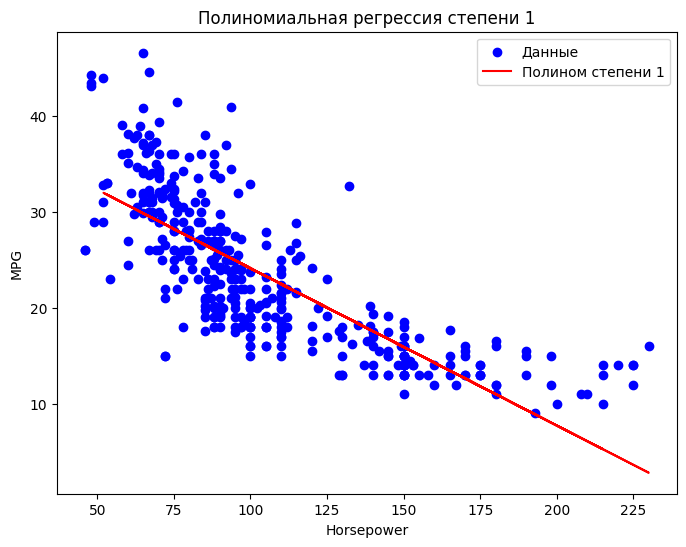

Mean Squared Error для полинома степени 2: 13.941158940364115


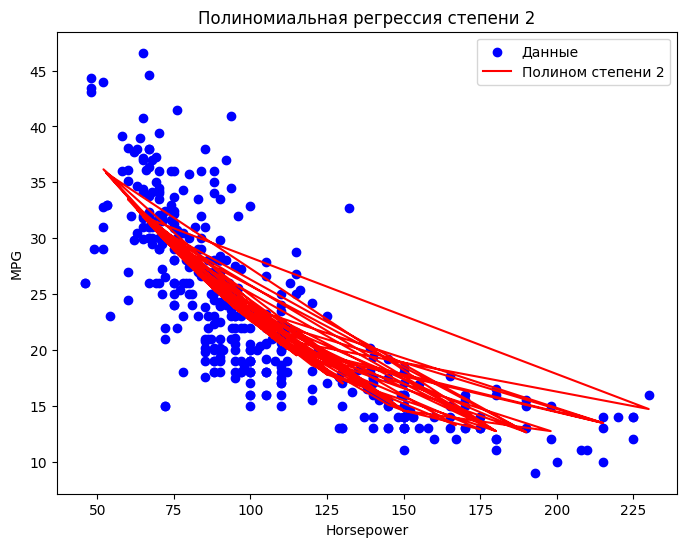

Mean Squared Error для полинома степени 3: 13.987543053869462


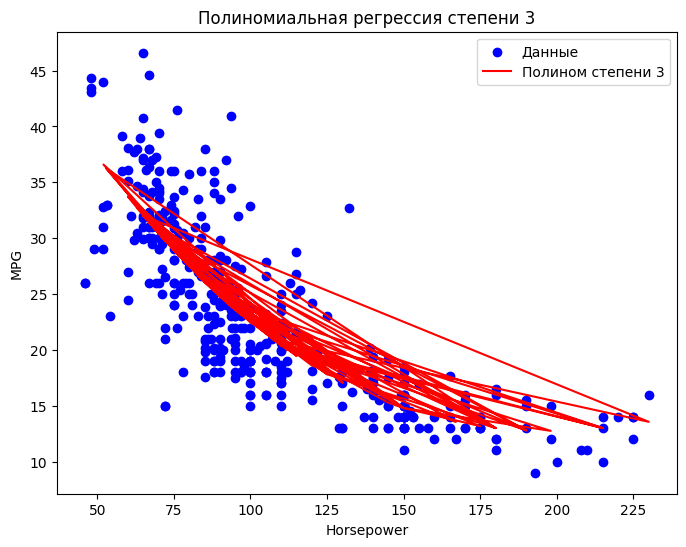

Mean Squared Error для полинома степени 4: 14.443392228858631


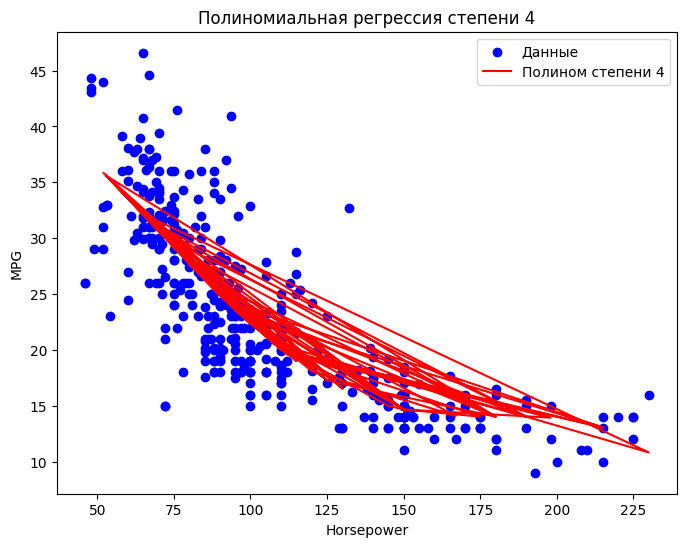

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
data = pd.read_csv("auto-mpg.data", names=column_names, delim_whitespace=True)

# Замена пропусков в 'horsepower' медианой
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data['horsepower'].fillna(data['horsepower'].median(), inplace=True)

# Отбираем признаки и целевую переменную
X = data[['horsepower']]
y = data['mpg']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Функция для построения полиномиальной регрессии и отображения графика
def plot_polynomial_regression(degree):
    # Преобразуем данные в полиномиальные признаки заданной степени
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Обучаем модель
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Предсказания
    y_pred = model.predict(X_test_poly)
    
    # Вычисление MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error для полинома степени {degree}: {mse}")
    
    # Построение графика
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Данные')
    plt.plot(X_test, y_pred, color='red', label=f'Полином степени {degree}')
    plt.title(f"Полиномиальная регрессия степени {degree}")
    plt.xlabel("Horsepower")
    plt.ylabel("MPG")
    plt.legend()
    plt.show()

# Построение графиков для полиномиальных регрессий разных степеней
for degree in [1, 2, 3, 4]:
    plot_polynomial_regression(degree)


**Выводы по графикам:**

Чем больше лошадиных сил, тем ниже топливная эффективность автомобиля, что является логичным — более мощные машины требуют больше топлива.